# El mejor episodio de [inserta nombre de serie aquí]
Juliana Nieto Cárdenas \\
### De qué trata este Notebook
Esta herramienta muestra las calificaciones de IMDB de una serie en un mapa de calor.




## Cómo está hecho
Los datos de calificaciones se obtienen mediante el [conjunto de datos abiertos ](https://www.imdb.com/interfaces/)que brinda [IMDB](https://www.imdb.com/), los cuales son actualizados diariamente. 
La librería de `cinemagoer` de Python, obtiene estos datos de una manera eficiente con su [API](https://cinemagoer.readthedocs.io/en/latest/).

- Instalación de `cinemagoer`

In [1]:
! pip install cinemagoer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 KB 7.9 MB/s eta 0:00:00


In [2]:
import imdb
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


- La clase de `myseries` almacena los datos de título de serie y sus episodios, los cuales se expresan en forma de matriz. También, cuenta con los métodos para graficar el mapa de calor
- La clase de `myepisode` almacena los datos de título de episodio, número de temporada, número de episodio y calificación de IMDB.

In [15]:
class myseries:
    def __init__(self, title, episodes):
        self.title = title
        self.episodes = episodes

    def numberfy(self): 
      matrix = []     
      maxLen = 0
      for season in self.episodes:
        thisSeason = []
        for episode in season:
          thisSeason.append(episode.rating)
        if(len(thisSeason) != 0):
          matrix.append(thisSeason)
        if(len(thisSeason) > maxLen):
          maxLen = len(thisSeason)
      
      return self.square(matrix,maxLen)

    def square(self, matrix, maxLen):
      for i in range(len(matrix)):    
        zfilling = maxLen - len(matrix[i])
        matrix[i] = np.pad(matrix[i],(0,zfilling),'constant', constant_values=(0,0))
      return np.array(matrix)
    

    def plot_series_heatmap(self):
      ratings_matrix = self.numberfy()
      sns.set()
      #labels 
      # x labels
      xlabels = range(1,len(ratings_matrix[0])+1)
      # y labels
      ylabels = ["s"+str(i+1) for i in range(len(ratings_matrix))]
      ax = sns.heatmap(ratings_matrix, vmin=0, vmax=10,cmap="BuPu",xticklabels=xlabels,yticklabels=ylabels)
      plt.show()

    def __best_episodes_each_season(self):
      best_episodes = []
      for season in self.episodes:
        best_episode = None
        best_rating = 0
        for episode in season:
          
          if episode.rating > best_rating:
            best_episode = episode
            best_rating = episode.rating

        best_episodes.append(best_episode)
      
      return best_episodes

    def best_each_season(self):
      best_episodes = myseries.__best_episodes_each_season(self)
      print(f"Mejores episodios de {self.title}")
      for i in range(len(best_episodes)):
        current_episode = best_episodes[i]
        print(f"Temporada {i+1}: {current_episode.__str__()}")

    def best_episode(self):
      best_episodes = myseries.__best_episodes_each_season(self)
      max_rating = 0
      the_best_episode = None
      for episode in best_episodes:
        if episode.rating > max_rating:
          max_rating = episode.rating
          the_best_episode = episode
      print(f"El mejor episodio de {self.title} es: {the_best_episode}")
      
          
      
class myepisode:
    def __init__(self, title, season, number,rating):
        self.title = title
        self.season = season
        self.number = number
        self.rating = rating

    def __str__(self):
        return f"Title: {self.title} \t ID: {self.season} - {self.number} \t Rating: {self.rating} \t "

In [16]:
def get_data():
  ia = imdb.Cinemagoer()

  
  series_title = input("El mejor episodio de: ")

  series_search = ia.search_movie(series_title)
  seriesId = series_search[0].movieID

  series = ia.get_movie(seriesId)
  ia.update(series, 'episodes')

  episodes = []

  for season in series['episodes']:
      currentSeason = series['episodes'][season]
      thisSeason = []
      for episode in currentSeason:
          try:
              episodeData = currentSeason[episode].data
              episodeTitle = episodeData['title']
              episodeSeason = episodeData['season']
              episodeNumber = episodeData['episode']
              episodeRating = episodeData['rating']
              newEpisode = myepisode(episodeTitle,episodeSeason,episodeNumber,episodeRating)
              thisSeason.append(newEpisode)
          except:
              pass
      if len(thisSeason) > 0:
        episodes.append(thisSeason)
  return series_title, episodes

## Cómo funciona
- La siguiente celda recibe una cadena con el nombre de la serie y recolecta los datos con `cinemagoer` (esto puede tomar algunos segundos)

**PRECAUCIÓN**: Algunos títulos de series presentan problemas en su recolección debido a la naturaleza del conjunto de datos de IMDB
*Títulos recomendados para su correcto funcionamiento:*
- Stranger Things
- The Office
- Breaking Bad


In [20]:
data = get_data()
series = myseries(data[0],data[1])

El mejor episodio de: The Office


- Se muestran los mejores de cada temporada de la serie con su respectiva calificación

In [21]:
series.best_each_season()

Mejores episodios de The Office
Temporada 1: Title: Basketball 	 ID: 1 - 5 	 Rating: 8.201234567891 	 
Temporada 2: Title: Casino Night 	 ID: 2 - 22 	 Rating: 9.301234567891 	 
Temporada 3: Title: The Job 	 ID: 3 - 23 	 Rating: 9.201234567891 	 
Temporada 4: Title: Dinner Party 	 ID: 4 - 9 	 Rating: 9.401234567891 	 
Temporada 5: Title: Stress Relief 	 ID: 5 - 13 	 Rating: 9.701234567891 	 
Temporada 6: Title: Niagara: Part 2 	 ID: 6 - 5 	 Rating: 9.401234567891 	 
Temporada 7: Title: Goodbye, Michael 	 ID: 7 - 21 	 Rating: 9.801234567891 	 
Temporada 8: Title: The Incentive 	 ID: 8 - 2 	 Rating: 8.001234567891 	 
Temporada 9: Title: Finale 	 ID: 9 - 23 	 Rating: 9.801234567891 	 


- Finalmente, se muestra el **mapa de calor**

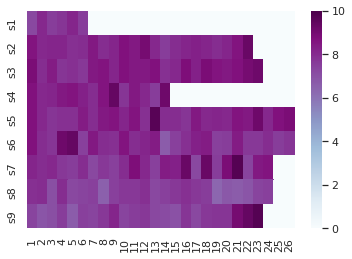

In [22]:
series.plot_series_heatmap()

- Se muestra el mejor episodio de toda la serie

In [23]:
mejor = series.best_episode()



El mejor episodio de The Office es: Title: Goodbye, Michael 	 ID: 7 - 21 	 Rating: 9.801234567891 	 
